## Data Preprocessing

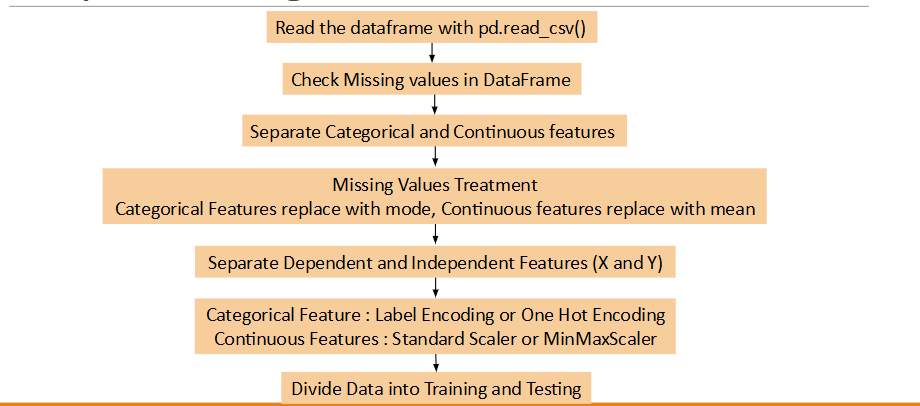

#### Data Ingestion : Read the dataset

In [143]:
path = r"C:\Users\Prach\Downloads\Cars93.csv"

In [144]:
import pandas as pd
df = pd.read_csv(path,na_values=["","NA"],keep_default_na=False)
df.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


#### Perform basic data quality checks

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             89 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

In [146]:
df.shape

(93, 28)

In [147]:
## Check for missing values
s = df.isna() .sum()
s[s>0]

AirBags            4
Rear.seat.room     2
Luggage.room      11
dtype: int64

In [148]:
df.duplicated().sum()

np.int64(0)

#### Data cleaning process


     Missing values are present in the dataset. Let's handle them 
    Categorical features:   Replace missing values with Mode
    Continuous features :   Replace missing values with Mean/Median

#### Separate data into categorical and continuous features


In [149]:
df.columns

Index(['id', 'Manufacturer', 'Model', 'Type', 'Min.Price', 'Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make'],
      dtype='object')

In [150]:
df.columns[df.dtypes=="object"]

Index(['Manufacturer', 'Model', 'Type', 'AirBags', 'DriveTrain', 'Cylinders',
       'Man.trans.avail', 'Origin', 'Make'],
      dtype='object')

In [151]:
df.columns[df.dtypes!="object"]

Index(['id', 'Min.Price', 'Price', 'Max.Price', 'MPG.city', 'MPG.highway',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Fuel.tank.capacity',
       'Passengers', 'Length', 'Wheelbase', 'Width', 'Turn.circle',
       'Rear.seat.room', 'Luggage.room', 'Weight'],
      dtype='object')

In [152]:
cat = list(df.columns[df.dtypes=="object"])
con = list(df.columns[df.dtypes!="object"])
print(cat)
print(con)

['Manufacturer', 'Model', 'Type', 'AirBags', 'DriveTrain', 'Cylinders', 'Man.trans.avail', 'Origin', 'Make']
['id', 'Min.Price', 'Price', 'Max.Price', 'MPG.city', 'MPG.highway', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight']


In [153]:
for i in df.columns:
    print(i)

id
Manufacturer
Model
Type
Min.Price
Price
Max.Price
MPG.city
MPG.highway
AirBags
DriveTrain
Cylinders
EngineSize
Horsepower
RPM
Rev.per.mile
Man.trans.avail
Fuel.tank.capacity
Passengers
Length
Wheelbase
Width
Turn.circle
Rear.seat.room
Luggage.room
Weight
Origin
Make


In [154]:
df["Origin"].mode()[0]

'USA'

In [155]:
def handle_missing(df):
    for i in df.columns:
        if i in cat:
            md = df[i].mode()[0]
            df[i] = df[i].fillna(md)
        else:
            mn = df[i].mean()
            df[i] = df[i].fillna(mn)
    print("Missing values Handled")

In [156]:
handle_missing(df)

Missing values Handled


In [157]:
df.isna().sum()

id                    0
Manufacturer          0
Model                 0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               0
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        0
Luggage.room          0
Weight                0
Origin                0
Make                  0
dtype: int64

#### Separate X and Y features
     X: Indepdent features
     Y: Dependent features/ Target Feature : Weight

In [158]:
X = df.drop(columns=["Weight","id"])
Y = df[["Weight"]]

In [159]:
X.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,13.2,5,177,102,68,37,26.5,11.0,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,18.0,5,195,115,71,38,30.0,15.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,16.9,5,180,102,67,37,28.0,14.0,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver only,Front,...,21.1,6,193,106,70,37,31.0,17.0,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,21.1,4,186,109,69,39,27.0,13.0,non-USA,BMW 535i


In [160]:
Y.head()

,Weight
0,2705
1,3560
2,3375
3,3405
4,3640


In [161]:
df1 = df.copy()
df1.head(1)

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra


In [162]:
df2 = df1.drop(columns="Weight")
df2.head(1)

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,13.2,5,177,102,68,37,26.5,11.0,non-USA,Acura Integra


In [163]:
df2.shape


(93, 27)

## Data Preprocessing
     Categorical into numerical with the help encoding techniques
     Continuous into similar scale of data 

     Before training the model with complete data, we process the data and then train the model.

     Categorical:
     In order to make our machine understand text related information, we convert text data into numerical data with the help of encoding techniques

     Continuous:
     In order to bring all the columns to a column scale, we convert numerical columns into a standard scale using Normalization / Standardization

In [164]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore',sparse_output=False).set_output(transform='pandas')

     handle_unknown : If any unknown category is encountered by the machine, how should it handle 
    'error' : it is going to throw an error
    'ignore' : we are asking the machine to ignore it
    'warn': it will throw warnings

     sparse_output:
    sparse data: data contains many zeros or missing values
    sparse_output : False. we are mentioning the machine not to consider the output data as sparse data

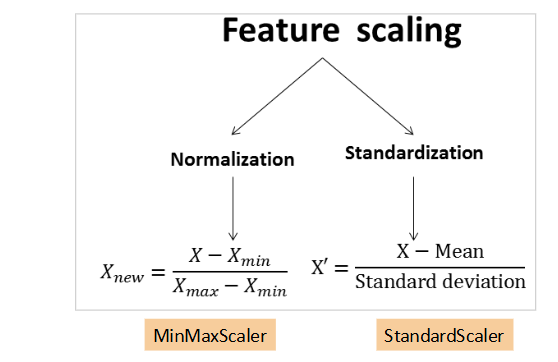

In [165]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler().set_output(transform='pandas')

In [166]:
X_cat = X[cat]
X_cat.head(1)

,Manufacturer,Model,Type,AirBags,DriveTrain,Cylinders,Man.trans.avail,Origin,Make
0,Acura,Integra,Small,None,Front,4,Yes,non-USA,Acura Integra


In [167]:
con

['id',
 'Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room',
 'Weight']

In [168]:
con.remove('Weight')

In [169]:
con

['id',
 'Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room']

In [170]:
con.remove('id')

In [171]:
X_con = X[con]
X_con.head(1)

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room
0,12.9,15.9,18.8,25,31,1.8,140,6300,2890,13.2,5,177,102,68,37,26.5,11.0


In [172]:
X_cat_pre = ohe.fit_transform(X_cat)
X_cat_pre.head()

,Manufacturer_Acura,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,Manufacturer_Chrylser,Manufacturer_Chrysler,Manufacturer_Dodge,Manufacturer_Eagle,...,Make_Toyota Camry,Make_Toyota Celica,Make_Toyota Previa,Make_Toyota Tercel,Make_Volkswagen Corrado,Make_Volkswagen Eurovan,Make_Volkswagen Fox,Make_Volkswagen Passat,Make_Volvo 240,Make_Volvo 850
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [173]:
X_con_pre = ss.fit_transform(X_con)
X_con_pre.head()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room
0,-0.485787,-0.375720,-0.282465,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,-1.062184,-0.083243,-0.427186,-0.286932,-0.366184,-0.610436,-0.452197,-1.033015
1,1.388017,1.497844,1.531409,-0.781032,-0.770514,0.515869,1.078322,0.369586,0.005661,0.409445,-0.083243,0.812171,1.629649,0.431983,-0.298510,0.738090,0.396643
2,1.008658,0.998227,0.948052,-0.423219,-0.581941,0.128186,0.540813,0.369586,-0.105713,0.072197,-0.083243,-0.220626,-0.286932,-0.632239,-0.610436,0.057926,0.039228
3,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,0.884457,0.674465,0.302785,0.165927,-0.610436,1.078172,1.111472
4,0.755752,1.091905,1.303535,-0.065407,0.172352,0.806631,1.231897,0.706562,0.430909,1.359872,-1.050944,0.192493,0.745073,-0.100128,0.013416,-0.282156,-0.318186


In [174]:
X_pre = X_cat_pre.join(X_con_pre)
X_pre

,Manufacturer_Acura,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,Manufacturer_Chrylser,Manufacturer_Chrysler,Manufacturer_Dodge,Manufacturer_Eagle,...,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.717489,1.129530,-1.062184,-0.083243,-0.427186,-0.286932,-0.366184,-0.610436,-0.452197,-1.033015
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.369586,0.005661,0.409445,-0.083243,0.812171,1.629649,0.431983,-0.298510,0.738090,0.396643
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.369586,-0.105713,0.072197,-0.083243,-0.220626,-0.286932,-0.632239,-0.610436,0.057926,0.039228
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.369586,0.410659,1.359872,0.884457,0.674465,0.302785,0.165927,-0.610436,1.078172,1.111472
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.706562,0.430909,1.359872,-1.050944,0.192493,0.745073,-0.100128,0.013416,-0.282156,-0.318186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.315292,1.180155,1.359872,1.852158,0.261346,1.629649,0.698038,-0.298510,2.098419,0.000000
89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.875050,0.714407,0.562740,-0.083243,-0.220626,-0.139503,-0.632239,-1.234288,1.248213,0.039228
90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.875050,0.106911,0.562740,-1.050944,-1.666543,-1.024079,-0.898295,-0.922362,-0.622238,0.396643
91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.201098,-0.237337,-0.265051,-0.083243,0.467905,0.007926,-0.632239,-0.610436,0.568049,0.039228


### Build a model for final predictions

In [175]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_pre,Y)

LinearRegression()

In [176]:
model.score(X_pre,Y)

1.0

### Train Test Split 

     Divide the data into training data and testing data
     dataset => 70%-80% training ... 20%-30% testing

#### Model Evaluation

In [177]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [178]:
def evaluate(modelname):
    # calculate ypred data
    ypred = model.predict(X_pre)

    # calculate MSE
    mse = mean_squared_error(Y,ypred)

    # calculate RMSE
    rmse = mse**(1/2)

    # calculate MAE
    mae = mean_absolute_error(Y,ypred)

    # calculate R2 score
    r2 = r2_score(Y,ypred)

    # print out all the values
    print(f"Mean squared error is {round(mse,2)}")
    print(f"Root Mean squared error is {round(rmse,2)}")
    print(f"Mean absolute error is {round(mae,2)}")
    print(f"R2 score is {round(r2*100,2)}%")

In [179]:
evaluate(model)

Mean squared error is 0.0
Root Mean squared error is 0.0
Mean absolute error is 0.0
R2 score is 100.0%


In [180]:
ypred = model.predict(X_pre)
ypred[:5]

array([[2705.],
       [3560.],
       [3375.],
       [3405.],
       [3640.]])

In [181]:
Y.head()

,Weight
0,2705
1,3560
2,3375
3,3405
4,3640


### R2 score is 100% . Lets consider this for out of sample predictions


In [182]:
path = r"C:\Users\Prach\Downloads\sample_cars93.csv"

In [183]:
xnew = pd.read_csv(path,na_values=["","NA"],keep_default_na=False)
xnew.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,...,15.0,6,190,106,65,37,31.0,17.0,non-USA,Audi 100
1,Pontiac,Sunbird,Compact,9.4,11.1,12.8,23,31,None,Front,...,15.2,5,181,101,66,39,25.0,13.0,USA,Pontiac Sunbird
2,Chevrolet,Lumina,Midsize,13.4,15.9,18.4,21,29,None,Front,...,16.5,6,198,108,71,40,28.5,16.0,USA,Chevrolet Lumina
3,Mazda,RX-7,Sporty,32.5,32.5,32.5,17,25,Driver only,Rear,...,20.0,2,169,96,69,37,NaN,NaN,non-USA,Mazda RX-7
4,Volkswagen,Fox,Small,8.7,9.1,9.5,25,33,None,Front,...,12.4,4,163,93,63,34,26.0,10.0,non-USA,Volkswagen Fox


In [184]:
handle_missing(xnew)

Missing values Handled


In [185]:
xnew_cat= xnew[cat]
xnew

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Audi,100,Midsize,30.8,37.7,44.6,19,26,None,Front,...,15.0,6,190,106,65,37,31.000,17.0,non-USA,Audi 100
1,Pontiac,Sunbird,Compact,9.4,11.1,12.8,23,31,None,Front,...,15.2,5,181,101,66,39,25.000,13.0,USA,Pontiac Sunbird
2,Chevrolet,Lumina,Midsize,13.4,15.9,18.4,21,29,None,Front,...,16.5,6,198,108,71,40,28.500,16.0,USA,Chevrolet Lumina
3,Mazda,RX-7,Sporty,32.5,32.5,32.5,17,25,Driver only,Rear,...,20.0,2,169,96,69,37,27.625,14.0,non-USA,Mazda RX-7
4,Volkswagen,Fox,Small,8.7,9.1,9.5,25,33,None,Front,...,12.4,4,163,93,63,34,26.000,10.0,non-USA,Volkswagen Fox


In [186]:
xnew_con = xnew[con]
xnew_con

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room
0,30.8,37.7,44.6,19,26,2.8,172,5500,2535,15.0,6,190,106,65,37,31.000,17.0
1,9.4,11.1,12.8,23,31,2.0,110,5200,2665,15.2,5,181,101,66,39,25.000,13.0
2,13.4,15.9,18.4,21,29,2.2,110,5200,2595,16.5,6,198,108,71,40,28.500,16.0
3,32.5,32.5,32.5,17,25,1.3,255,6500,2325,20.0,2,169,96,69,37,27.625,14.0
4,8.7,9.1,9.5,25,33,1.8,81,5500,2550,12.4,4,163,93,63,34,26.000,10.0


In [187]:
xnew_cat_pre = ohe.transform(xnew_cat)
xnew_cat_pre

,Manufacturer_Acura,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,Manufacturer_Chrylser,Manufacturer_Chrysler,Manufacturer_Dodge,Manufacturer_Eagle,...,Make_Toyota Camry,Make_Toyota Celica,Make_Toyota Previa,Make_Toyota Tercel,Make_Volkswagen Corrado,Make_Volkswagen Eurovan,Make_Volkswagen Fox,Make_Volkswagen Passat,Make_Volvo 240,Make_Volvo 850
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [188]:
xnew_con_pre = ss.transform(xnew_con)
xnew_con_pre

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room
0,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,-0.510323,0.884457,0.467905,0.302785,-1.164350,-0.610436,1.078172,1.111472
1,-0.888138,-0.875337,-0.829362,0.113500,0.360925,-0.647181,-0.649388,-0.135877,0.673908,-0.449005,-0.083243,-0.151773,-0.434362,-0.898295,0.013416,-0.962320,-0.318186
2,-0.428309,-0.375720,-0.318925,-0.244313,-0.016221,-0.453339,-0.649388,-0.135877,0.532158,-0.050439,0.884457,1.018731,0.597644,0.431983,0.325342,0.227967,0.754057
3,1.767376,1.352122,0.966282,-0.959938,-0.770514,-1.325626,2.134145,2.054464,-0.014589,1.022624,-2.986345,-0.978011,-1.171509,-0.100128,-0.610436,-0.069605,0.039228
4,-0.968608,-1.083511,-1.130155,0.471312,0.738071,-0.841022,-1.206095,0.369586,0.441034,-1.307455,-1.050944,-1.391130,-1.613797,-1.696461,-1.546214,-0.622238,-1.390430


In [189]:
xnew_pre = xnew_cat_pre.join(xnew_con_pre)
xnew_pre

,Manufacturer_Acura,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,Manufacturer_Chrylser,Manufacturer_Chrysler,Manufacturer_Dodge,Manufacturer_Eagle,...,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.369586,0.410659,-0.510323,0.884457,0.467905,0.302785,-1.164350,-0.610436,1.078172,1.111472
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.135877,0.673908,-0.449005,-0.083243,-0.151773,-0.434362,-0.898295,0.013416,-0.962320,-0.318186
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.135877,0.532158,-0.050439,0.884457,1.018731,0.597644,0.431983,0.325342,0.227967,0.754057
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.054464,-0.014589,1.022624,-2.986345,-0.978011,-1.171509,-0.100128,-0.610436,-0.069605,0.039228
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.369586,0.441034,-1.307455,-1.050944,-1.391130,-1.613797,-1.696461,-1.546214,-0.622238,-1.390430


In [190]:
X_pre.columns

Index(['Manufacturer_Acura', 'Manufacturer_Audi', 'Manufacturer_BMW',
       'Manufacturer_Buick', 'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrylser', 'Manufacturer_Chrysler', 'Manufacturer_Dodge',
       'Manufacturer_Eagle',
       ...
       'RPM', 'Rev.per.mile', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room'],
      dtype='object', length=257)

In [191]:
xnew_pre.columns

Index(['Manufacturer_Acura', 'Manufacturer_Audi', 'Manufacturer_BMW',
       'Manufacturer_Buick', 'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrylser', 'Manufacturer_Chrysler', 'Manufacturer_Dodge',
       'Manufacturer_Eagle',
       ...
       'RPM', 'Rev.per.mile', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room'],
      dtype='object', length=257)

In [192]:
xnew_cat_pre = ohe.transform(xnew_cat)
xnew_cat_pre

,Manufacturer_Acura,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,Manufacturer_Chrylser,Manufacturer_Chrysler,Manufacturer_Dodge,Manufacturer_Eagle,...,Make_Toyota Camry,Make_Toyota Celica,Make_Toyota Previa,Make_Toyota Tercel,Make_Volkswagen Corrado,Make_Volkswagen Eurovan,Make_Volkswagen Fox,Make_Volkswagen Passat,Make_Volvo 240,Make_Volvo 850
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [193]:
xnew_con_pre = ss.transform(xnew_con)
xnew_con_pre

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room
0,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,-0.510323,0.884457,0.467905,0.302785,-1.164350,-0.610436,1.078172,1.111472
1,-0.888138,-0.875337,-0.829362,0.113500,0.360925,-0.647181,-0.649388,-0.135877,0.673908,-0.449005,-0.083243,-0.151773,-0.434362,-0.898295,0.013416,-0.962320,-0.318186
2,-0.428309,-0.375720,-0.318925,-0.244313,-0.016221,-0.453339,-0.649388,-0.135877,0.532158,-0.050439,0.884457,1.018731,0.597644,0.431983,0.325342,0.227967,0.754057
3,1.767376,1.352122,0.966282,-0.959938,-0.770514,-1.325626,2.134145,2.054464,-0.014589,1.022624,-2.986345,-0.978011,-1.171509,-0.100128,-0.610436,-0.069605,0.039228
4,-0.968608,-1.083511,-1.130155,0.471312,0.738071,-0.841022,-1.206095,0.369586,0.441034,-1.307455,-1.050944,-1.391130,-1.613797,-1.696461,-1.546214,-0.622238,-1.390430


In [194]:
xnew_pre = xnew_cat_pre.join(xnew_con_pre)
xnew_pre

,Manufacturer_Acura,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,Manufacturer_Chrylser,Manufacturer_Chrysler,Manufacturer_Dodge,Manufacturer_Eagle,...,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.369586,0.410659,-0.510323,0.884457,0.467905,0.302785,-1.164350,-0.610436,1.078172,1.111472
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.135877,0.673908,-0.449005,-0.083243,-0.151773,-0.434362,-0.898295,0.013416,-0.962320,-0.318186
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.135877,0.532158,-0.050439,0.884457,1.018731,0.597644,0.431983,0.325342,0.227967,0.754057
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.054464,-0.014589,1.022624,-2.986345,-0.978011,-1.171509,-0.100128,-0.610436,-0.069605,0.039228
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.369586,0.441034,-1.307455,-1.050944,-1.391130,-1.613797,-1.696461,-1.546214,-0.622238,-1.390430


In [195]:
ypred_new = model.predict(xnew_pre)

In [196]:
ypred_new[:5]

array([[3223.46446761],
       [2575.        ],
       [3195.        ],
       [2896.59232736],
       [2240.        ]])

### Save weight predictions to dataframe and then to a csv file


dataframe_name["new_column_name"] = ypred_new


In [197]:
xnew["Weight"] = ypred_new
xnew

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make,Weight
0,Audi,100,Midsize,30.8,37.7,44.6,19,26,None,Front,...,6,190,106,65,37,31.000,17.0,non-USA,Audi 100,3223.464468
1,Pontiac,Sunbird,Compact,9.4,11.1,12.8,23,31,None,Front,...,5,181,101,66,39,25.000,13.0,USA,Pontiac Sunbird,2575.000000
2,Chevrolet,Lumina,Midsize,13.4,15.9,18.4,21,29,None,Front,...,6,198,108,71,40,28.500,16.0,USA,Chevrolet Lumina,3195.000000
3,Mazda,RX-7,Sporty,32.5,32.5,32.5,17,25,Driver only,Rear,...,2,169,96,69,37,27.625,14.0,non-USA,Mazda RX-7,2896.592327
4,Volkswagen,Fox,Small,8.7,9.1,9.5,25,33,None,Front,...,4,163,93,63,34,26.000,10.0,non-USA,Volkswagen Fox,2240.000000


In [198]:
xnew =xnew.round(2)

In [199]:
xnew.to_csv("OutofSamplePredictions.csv",index=False)